In [7]:
!pip install numpy pandas scikit-learn matplotlib seaborn plotly joblib missingno

In [8]:
!pip install category_encoders

In [9]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
df = pd.read_csv("/content/drive/MyDrive/AIML/car data.csv")

In [11]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  301
Number of columns are:  9


In [13]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


In [15]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [16]:
# Dataset Columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [17]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


In [18]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Car_Name is 98
No. of unique values in Year is 16
No. of unique values in Selling_Price is 156
No. of unique values in Present_Price is 148
No. of unique values in Driven_kms is 206
No. of unique values in Fuel_Type is 3
No. of unique values in Selling_type is 2
No. of unique values in Transmission is 2
No. of unique values in Owner is 3


In [19]:
# Adding a 'Current Year' column with a constant value of 2025 to the DataFrame
df['Current Year'] = 2025

# Calculating the age of the vehicles by subtracting the 'Year' column from the 'Current Year'
df['no_year'] = df['Current Year'] - df['Year']

In [20]:
# Removing the 'Current Year' column as it's no longer needed
df.drop(['Current Year'], axis=1, inplace=True)

In [21]:
# New updated DataFrame
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [22]:
# Defining dependent variable
dependent_variable = ['Selling_Price']

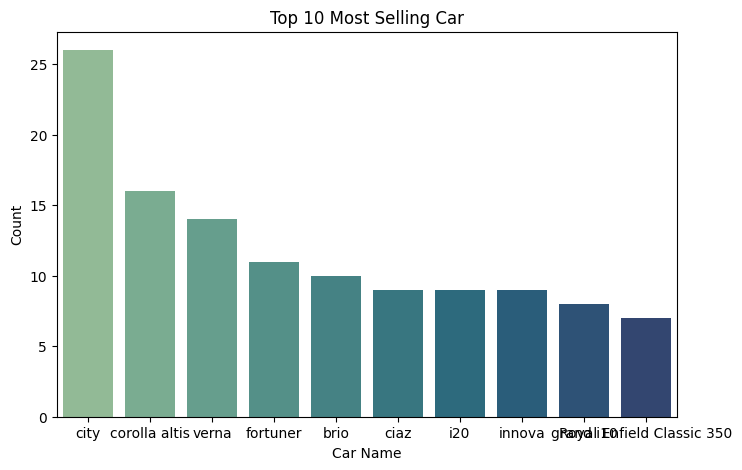

In [23]:
# Chart - 1 Count plot visualization code for top 10 most selling car
# Count the occurrences of each unique car name in the 'Car_Name' column and take the top 10 most selling car
top10 = df['Car_Name'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=df, order=top10.index, palette='crest')

# Set labels and title for the plot
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()

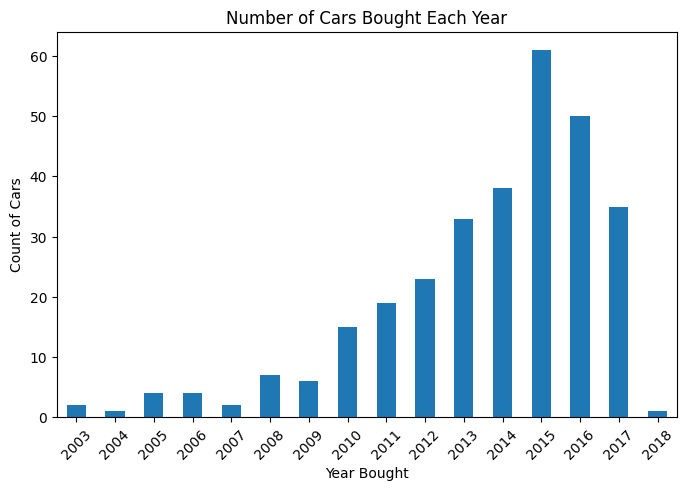

In [24]:
# Chart - 2 Bar plot visualization code for Number of Cars Bought Each Year
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Group the data by the 'Year' column and count the number of occurrences for each year
yearly_counts = df.groupby('Year').count()['Car_Name']

# Create a bar plot to visualize the count of cars bought in each year
yearly_counts.plot(kind='bar')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set labels and title for the plot
plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')

# Display the plot
plt.show()

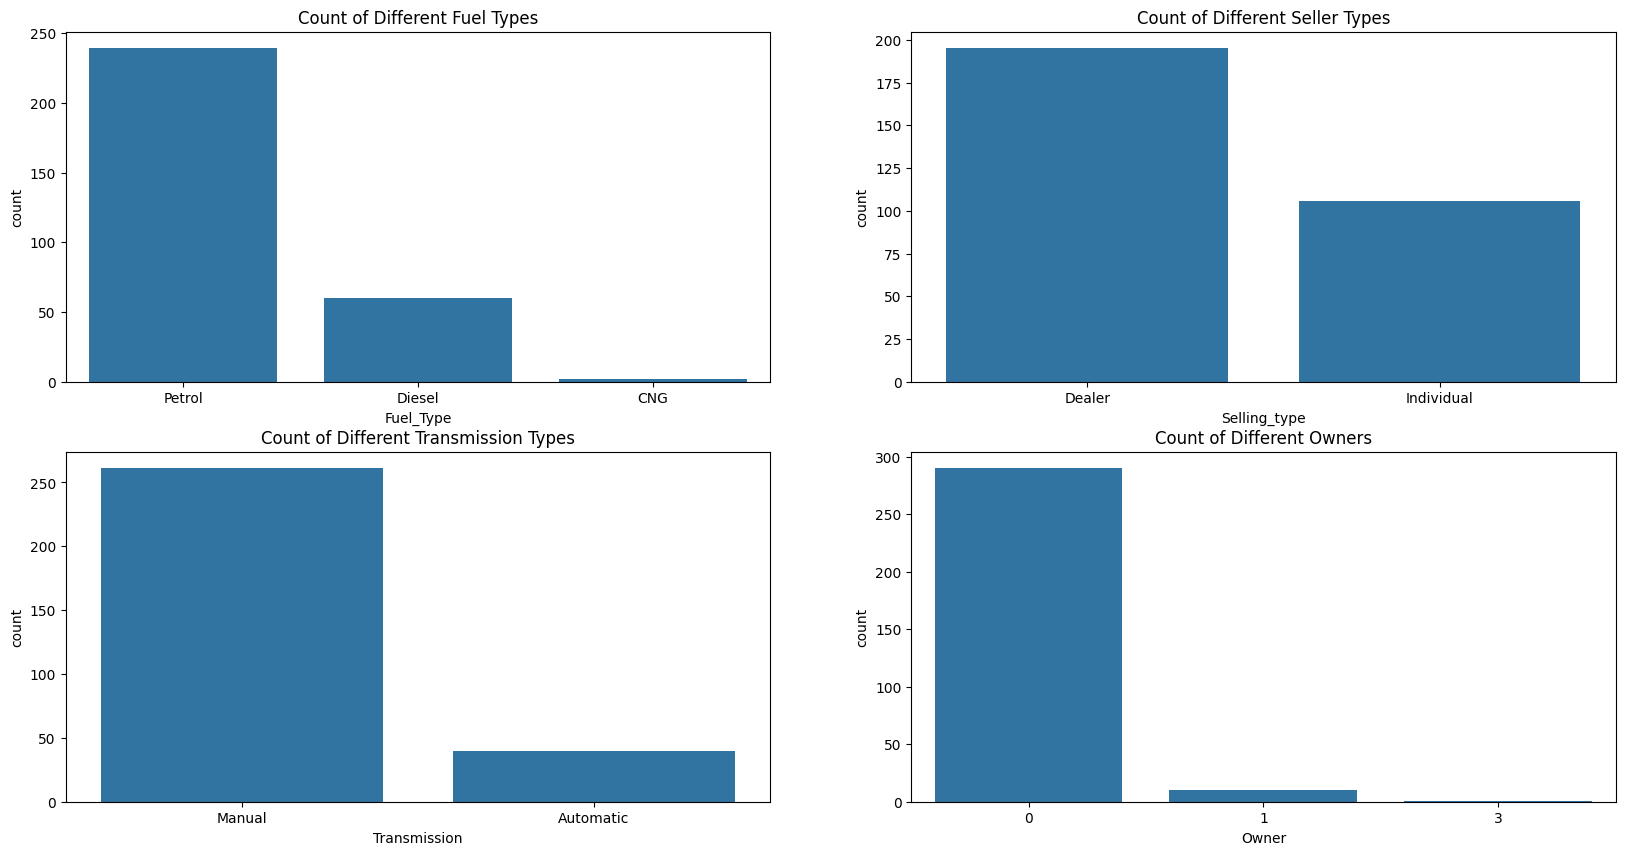

In [25]:
# Chart - 3 Count plot visualization code for Categorical Variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Count of different Fuel Types
plt.subplot(2,2,1)
sns.countplot(data=df, x = 'Fuel_Type')
plt.title("Count of Different Fuel Types")

# Subplot 2: Count of different Seller Types
plt.subplot(2,2,2)
sns.countplot(data=df, x = 'Selling_type')
plt.title("Count of Different Seller Types")

# Subplot 3: Count of different Transmission Types
plt.subplot(2,2,3)
sns.countplot(data=df, x = 'Transmission')
plt.title("Count of Different Transmission Types")

# Subplot 4: Count of different Owners
plt.subplot(2,2,4)
sns.countplot(data=df, x = 'Owner')
plt.title("Count of Different Owners")

# Display the plot
plt.show()

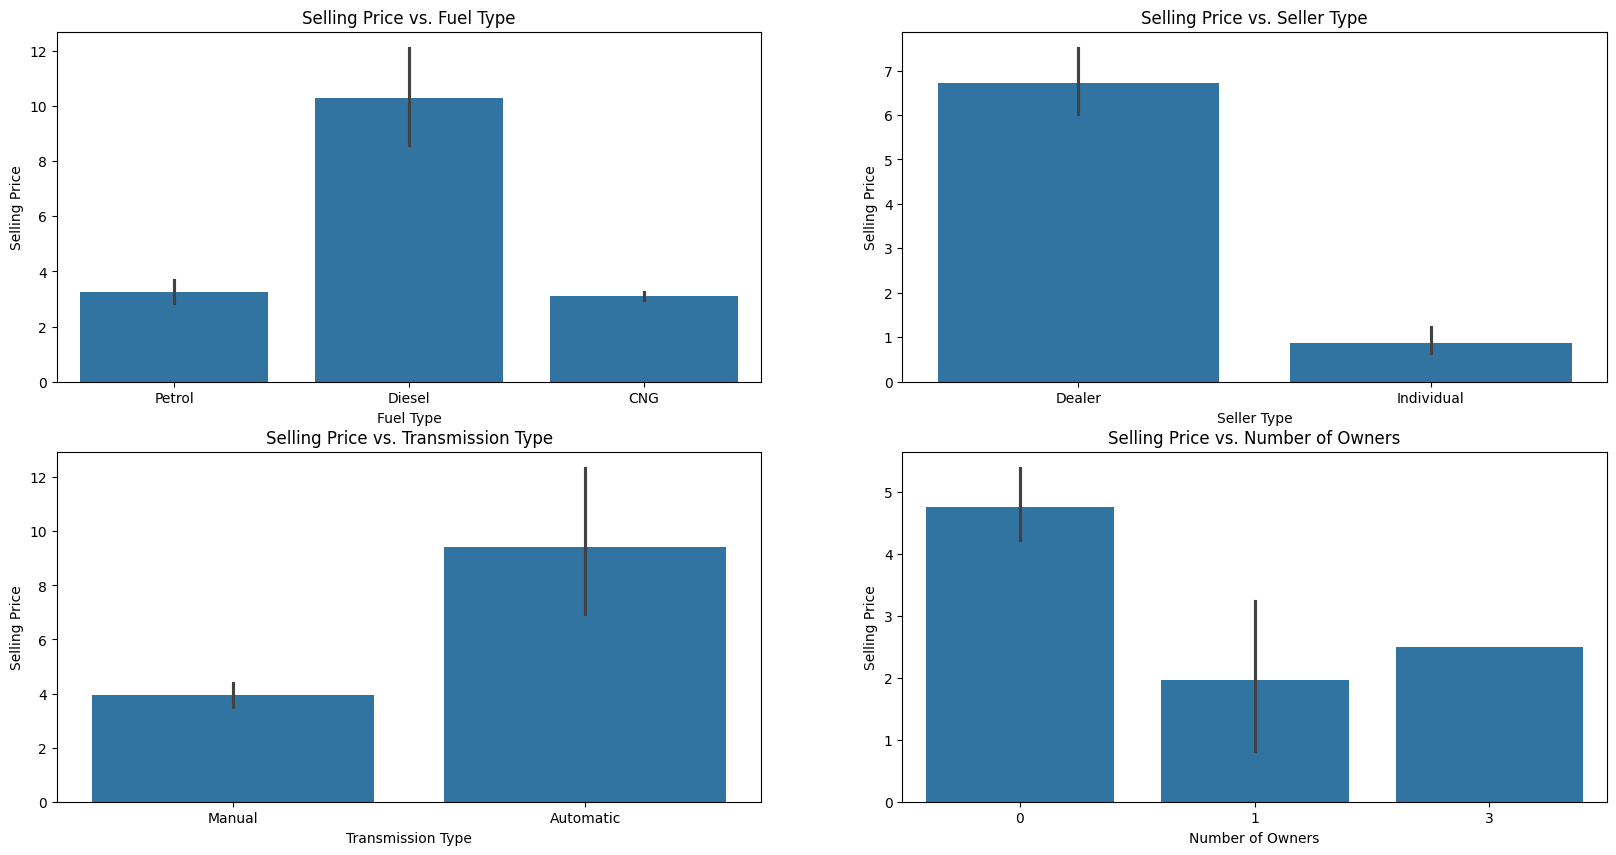

In [26]:
# Chart - 4 Barplot visualization code for categorical variable vs target variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for Selling_Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')

# Subplot 2: Barplot for Selling_Price vs. Seller_Type
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Seller Type')

# Subplot 3: Barplot for Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')

# Subplot 4: Barplot for Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Number of Owners')

# Display the plot
plt.show()

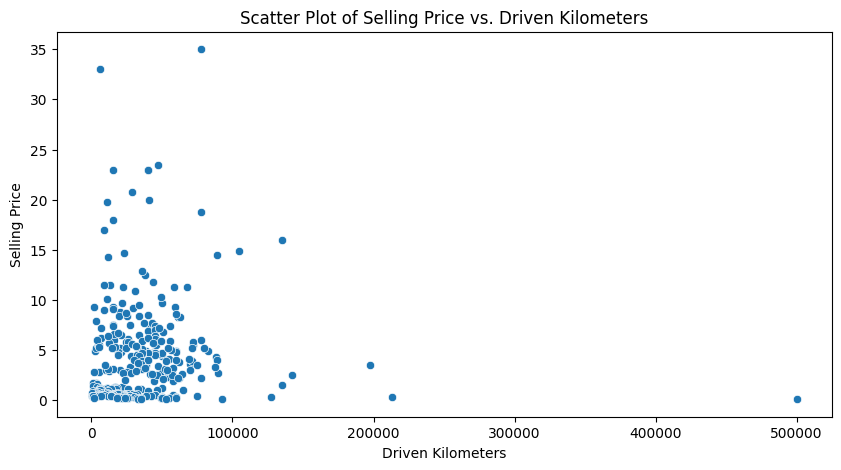

In [27]:
# Chart - 5 Scatter plot visualization code for Driven Kilometers vs Selling Price
# Set the figure size for the plot
plt.figure(figsize=(10,5))

# Create a scatter plot to visualize the relationship between Driven_kms and Selling_Price
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')

# Set labels for the x and y axes
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')

# Add a title to the plot
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

# Display the plot
plt.show()

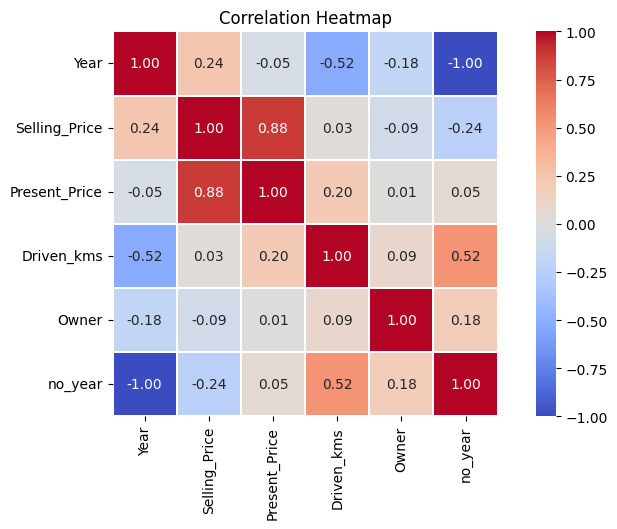

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [29]:
# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, q3, median = df.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Selling_Price'] = np.where(df['Selling_Price'] > upper_limit, median,np.where(df['Selling_Price'] < lower_limit,median,df['Selling_Price']))

# Removing outliers by Capping:
for col in ['Present_Price','Driven_kms','Owner','no_year']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [30]:
# Before Categorical Encoding, Remove the 'Car Name' as it's no longer needed
df.drop(['Car_Name'], axis=1, inplace=True)

In [31]:
# Using one-hot encoding to convert categorical variables into numerical format
df = pd.get_dummies(df)

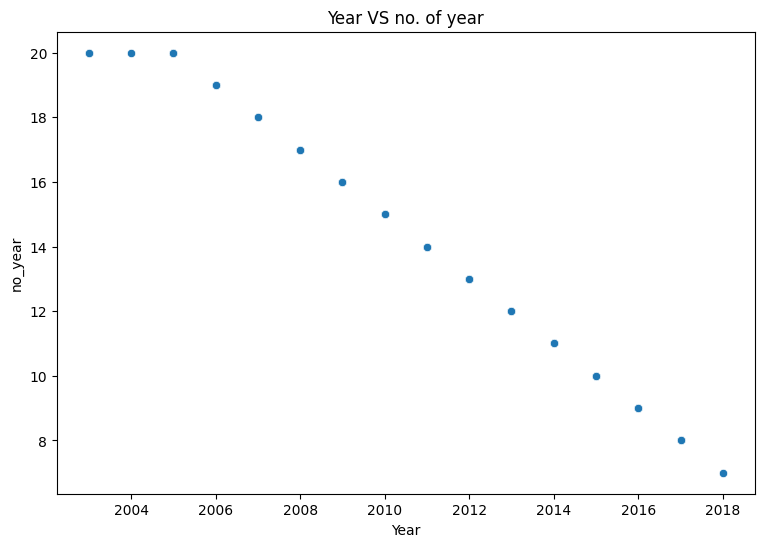

In [32]:
# Manipulate Features to minimize feature correlation and create new features

# We see that the Year and no_year are negatively highly correlated

# Plotting Scatter plot to visualize the relationship between
# Year and no_year
plt.figure(figsize=(9,6))
sns.scatterplot(x='Year',y='no_year',data=df)
plt.xlabel('Year')
plt.ylabel('no_year')
plt.title('Year VS no. of year')
plt.show()

In [33]:
# Correlation
df[['Year','no_year']].corr()

,Year,no_year
Year,1.000000,-0.998376
no_year,-0.998376,1.000000


In [34]:
# Removing 'Year' column as we've already calculated the age in the 'no_year' column
df.drop(['Year'], axis=1, inplace=True)

In [35]:
# Select your features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Selling_Price']]
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [36]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [37]:
continuous_variables = ['Present_Price', 'Driven_kms', 'Owner', 'no_year']

In [38]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [39]:
continuous_feature_df

,Present_Price,Driven_kms,Owner,no_year
0,5.59,27000.0,0.0,11.0
1,9.54,43000.0,0.0,12.0
2,9.85,6900.0,0.0,8.0
3,4.15,5200.0,0.0,14.0
4,6.87,42450.0,0.0,11.0
...,...,...,...,...
296,11.60,33988.0,0.0,9.0
297,5.90,60000.0,0.0,10.0
298,11.00,87934.0,0.0,16.0
299,12.50,9000.0,0.0,8.0


In [40]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,Present_Price,2.187052
1,Driven_kms,4.509676
2,Owner,1.059124
3,no_year,4.328862


In [41]:
# This is the final data for modeling
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,11.0,False,False,True,True,False,False,True
1,4.75,9.54,43000.0,0.0,12.0,False,True,False,True,False,False,True
2,7.25,9.85,6900.0,0.0,8.0,False,False,True,True,False,False,True
3,2.85,4.15,5200.0,0.0,14.0,False,False,True,True,False,False,True
4,4.60,6.87,42450.0,0.0,11.0,False,True,False,True,False,False,True


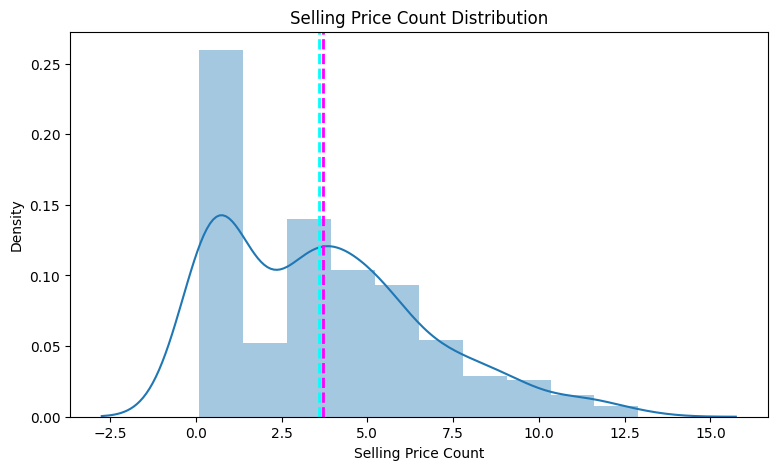

In [42]:
# Transform the data
# Visualizing the distribution of the dependent variable - Selling Price
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [43]:
# Skew of the dependent variable
df[dependent_variable].skew()

,0
Selling_Price,0.757016


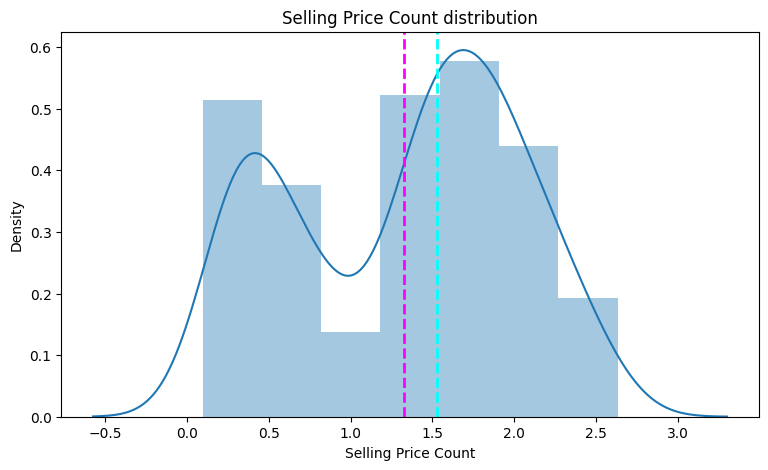

In [44]:
# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count distribution')
plt.axvline(np.log1p(df['Selling_Price']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['Selling_Price']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [45]:
# Skew of the dependent variable after log transformation
np.log1p(df[dependent_variable]).skew()

,0
Selling_Price,-0.222356


In [46]:
# Defining dependent and independent variables
X = df.drop('Selling_Price',axis=1)
y = np.log1p(df[dependent_variable])

In [47]:
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [48]:
features = [i for i in df.columns if i not in ['Selling_Price']]

In [49]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

In [50]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
Selling_Price,
1.526056,11
0.371564,6
0.470004,6
0.182322,5
1.609438,5
...,...
2.476538,1
2.521721,1
2.525729,1


In [142]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 5 important features, and returns a list of the model scores'''

  # Apply inverse log transformation to y_test and y_pred as we have used log transformation
  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Selling Price', fontsize=12)

  # Feature importances
  # Check if the model has feature_importances_ or coef_ attributes
  if hasattr(model, 'feature_importances_'):
      importance = model.feature_importances_
  else:
      try:
          # Attempt to get coef_ for linear models
          importance = np.abs(model.coef_)
          if importance.ndim > 1: # For multi-output models, take the first array
              importance = importance[0]
      except AttributeError:
          # If coef_ is not available (e.g., non-linear SVR), set importance to None
          importance = None
          print(f"Warning: Model {type(model).__name__} does not support direct feature importances. Skipping feature importance plot.")

  if importance is not None and len(importance) == len(features):
      feat = pd.Series(importance, index=features)
      plt.figure(figsize=(7,4))
      plt.title('Feature Importances (top 5) for '+str(type(model).__name__), fontsize = 12)
      plt.xlabel('Relative Importance')
      feat.nlargest(5).plot(kind='barh')
  elif importance is not None:
      # This case might occur if coef_ is 1D but length does not match features
      print(f"Warning: Feature importance length ({len(importance)}) does not match features length ({len(features)}). Skipping feature importance plot.")

  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [53]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

In [54]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

MSE : 4.169924716556089
RMSE : 2.0420393523524685
MAE : 1.2891485919279801
Train R2 : 0.6421421951879258
Test R2 : 0.4924417983344852
Adjusted R2 :  0.4217691373430844


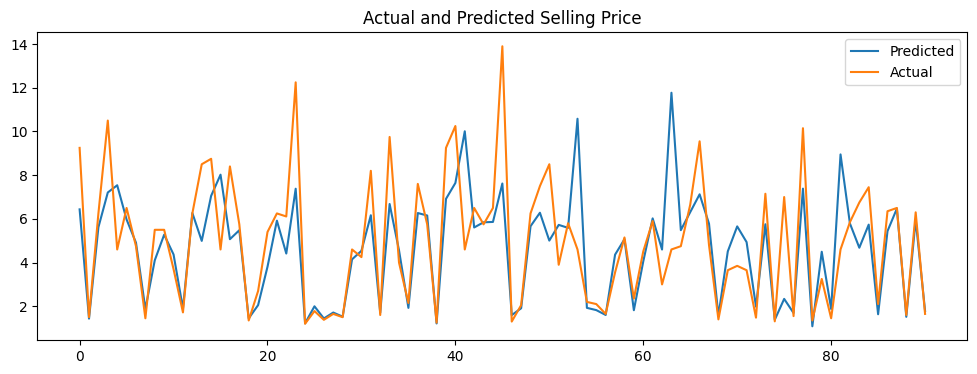

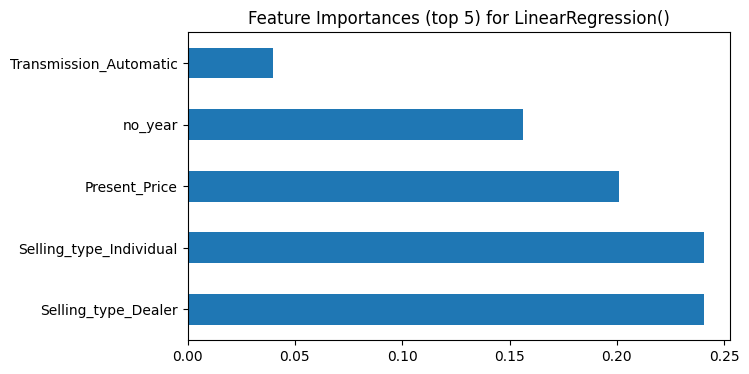

In [55]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

In [56]:
# Updated Evaluation Metric Score chart
score

,Linear regression
MSE,4.169925
RMSE,2.042039
MAE,1.289149
Train R2,0.642142
Test R2,0.492442
Adjusted R2,0.421769


In [57]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [58]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8058936696873664


In [59]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [60]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 4.169924716556089
RMSE : 2.0420393523524685
MAE : 1.2891485919279801
Train R2 : 0.6421421951879258
Test R2 : 0.4924417983344852
Adjusted R2 :  0.4217691373430844


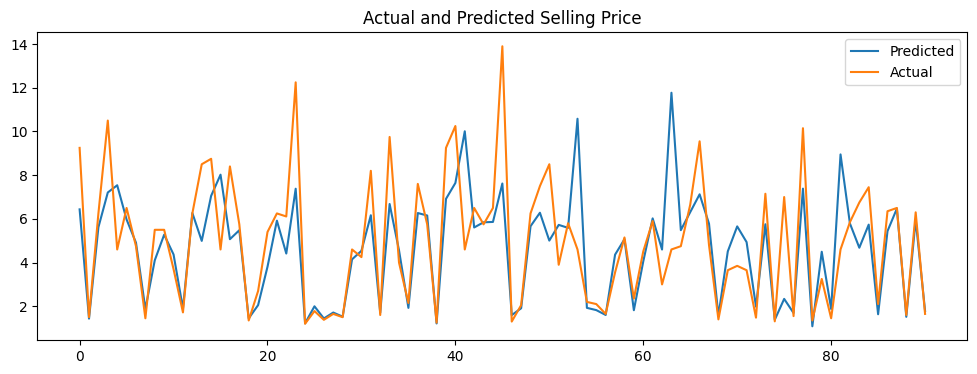

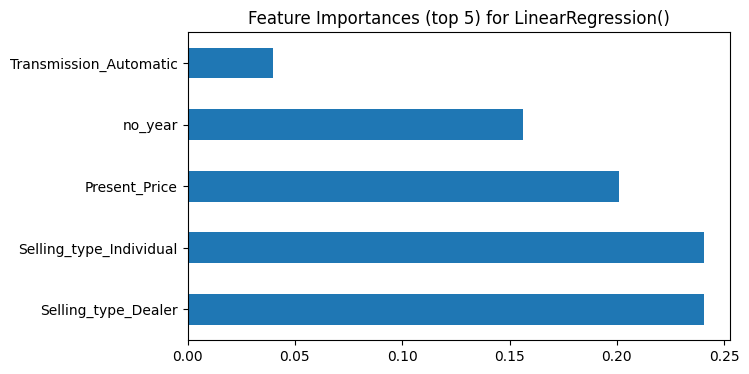

In [61]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [62]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,4.169925,4.169925
RMSE,2.042039,2.042039
MAE,1.289149,1.289149
Train R2,0.642142,0.642142
Test R2,0.492442,0.492442
Adjusted R2,0.421769,0.421769


In [63]:
# Import the Lasso Regression class
lasso = Lasso()

# Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

MSE : 9.807266785467892
RMSE : 3.1316555981569705
MAE : 2.513357873886036
Train R2 : -0.10059179585999933
Test R2 : -0.19372867167662267
Adjusted R2 :  -0.35994405634045634


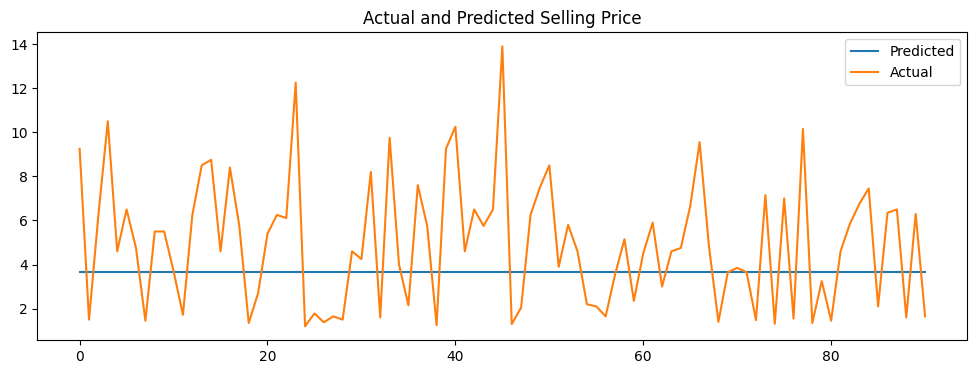

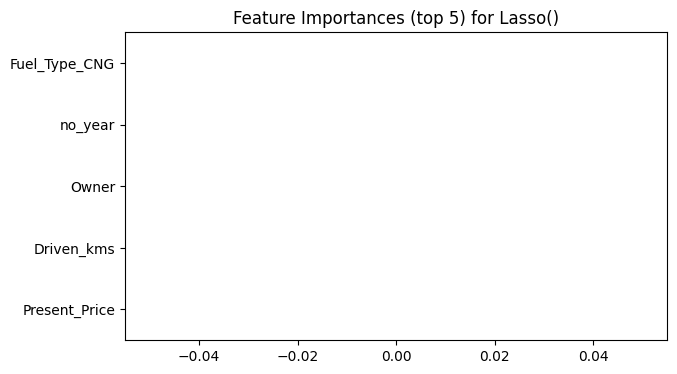

In [64]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [65]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression
MSE,4.169925,4.169925,9.807267
RMSE,2.042039,2.042039,3.131656
MAE,1.289149,1.289149,2.513358
Train R2,0.642142,0.642142,-0.100592
Test R2,0.492442,0.492442,-0.193729
Adjusted R2,0.421769,0.421769,-0.359944


In [66]:
# Define the model
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [67]:
# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.09201807273836608


In [68]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

MSE : 4.143092228273675
RMSE : 2.0354587267428625
MAE : 1.2972252346842903
Train R2 : 0.6362928099908935
Test R2 : 0.49570781641024586
Adjusted R2 :  0.425489917429394


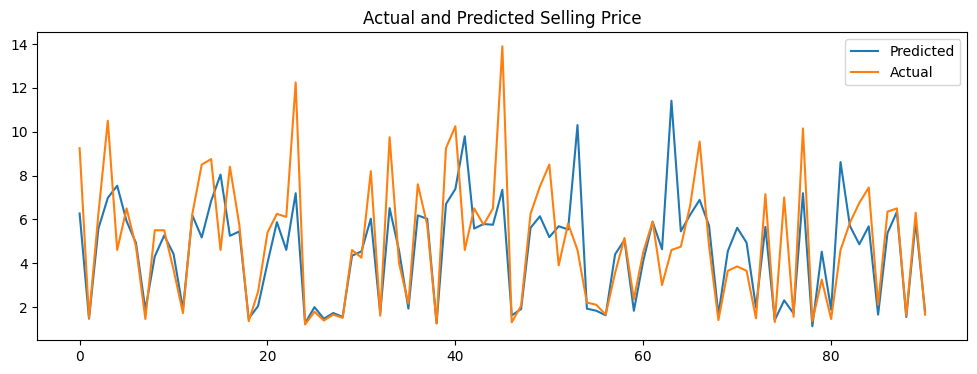

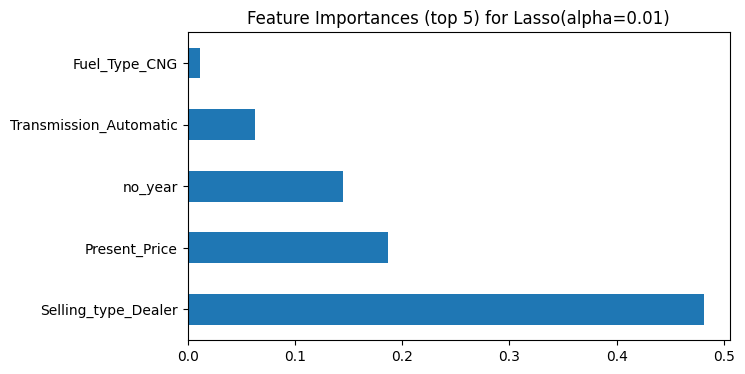

In [69]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

In [70]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01
MSE,4.169925,4.169925,9.807267,4.143092
RMSE,2.042039,2.042039,3.131656,2.035459
MAE,1.289149,1.289149,2.513358,1.297225
Train R2,0.642142,0.642142,-0.100592,0.636293
Test R2,0.492442,0.492442,-0.193729,0.495708
Adjusted R2,0.421769,0.421769,-0.359944,0.425490


In [71]:
# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

MSE : 4.1603985933002665
RMSE : 2.039705516318536
MAE : 1.2889405804291558
Train R2 : 0.6419159865096081
Test R2 : 0.49360130655519063
Adjusted R2 :  0.4230900960755336


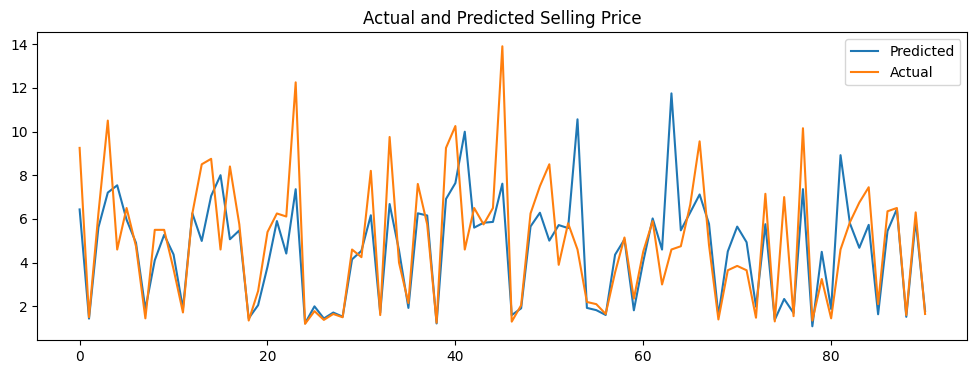

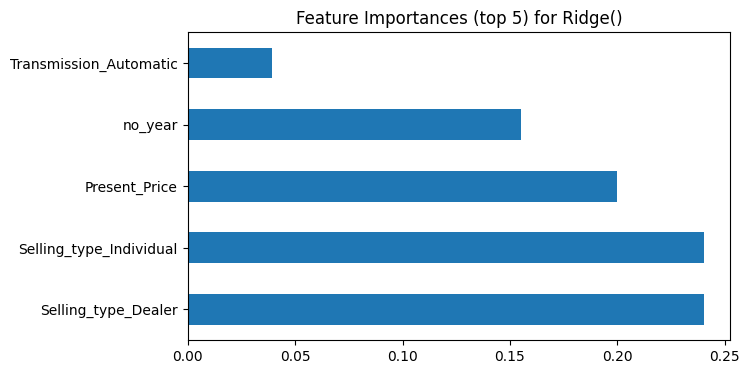

In [72]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [73]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge
MSE,4.169925,4.169925,9.807267,4.143092,4.160399
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706
MAE,1.289149,1.289149,2.513358,1.297225,1.288941
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090


In [74]:
# Import Ridge regressor Class
ridge = Ridge()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [75]:
# Getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.09239471817150409


In [76]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

MSE : 4.089084352387011
RMSE : 2.0221484496413735
MAE : 1.2916996819222408
Train R2 : 0.639256952993154
Test R2 : 0.5022815898531987
Adjusted R2 :  0.4329790264150365


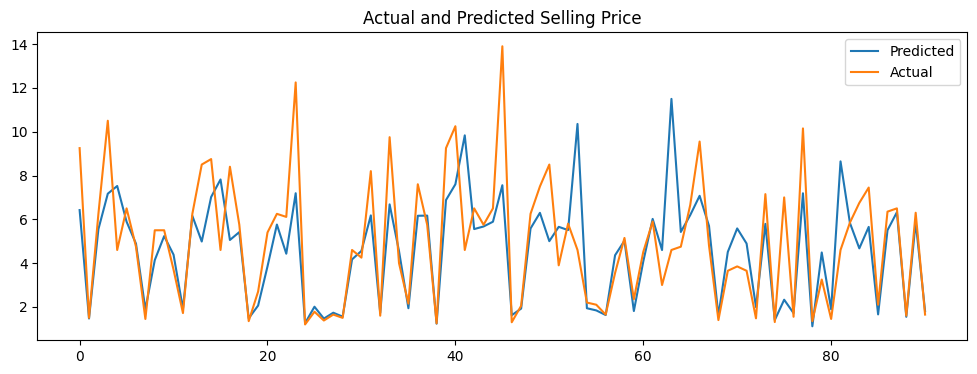

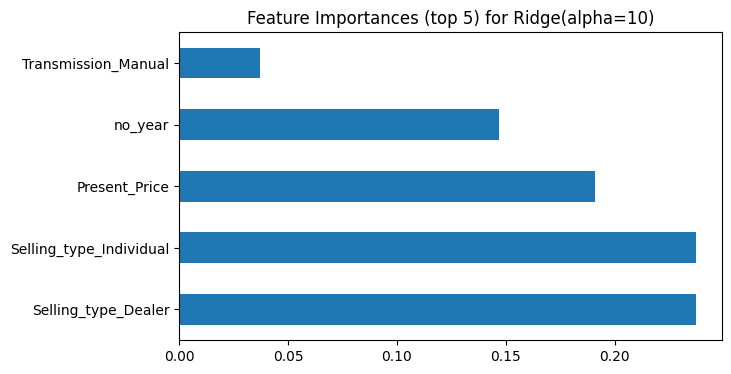

In [77]:
# Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

In [78]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979


In [79]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

MSE : 0.8086538461538465
RMSE : 0.8992518257717615
MAE : 0.58978021978022
Train R2 : 1.0
Test R2 : 0.901571630227721
Adjusted R2 :  0.8878664141834797


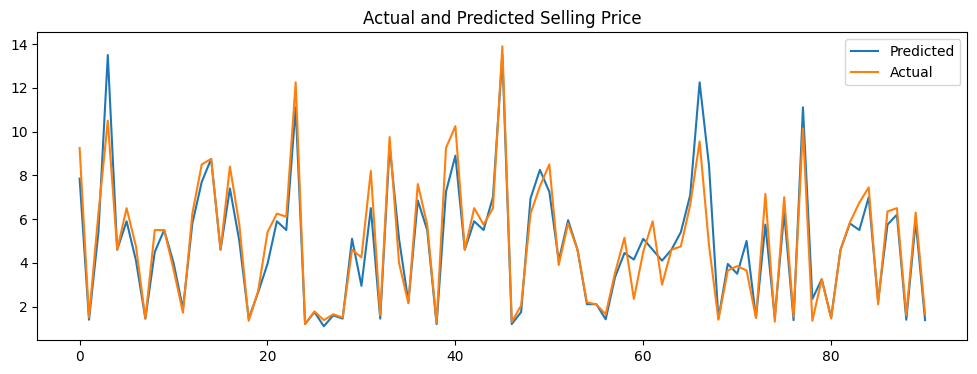

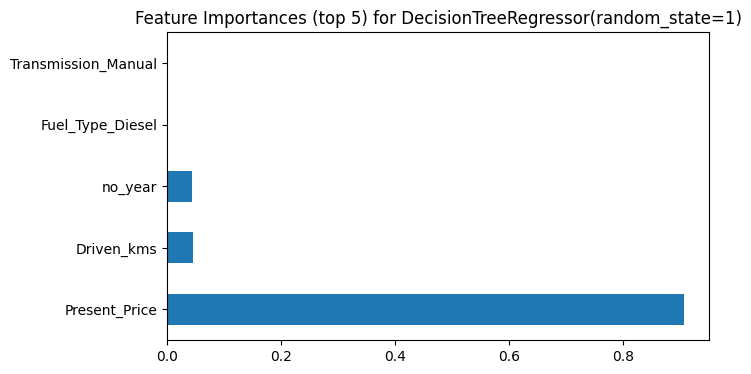

In [80]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [81]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866


In [82]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [83]:
dt_best_params

{'max_depth': 8,
 'min_samples_leaf': np.int64(24),
 'min_samples_split': np.int64(35)}

In [84]:
# Building Decision Tree model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [85]:
# Fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=np.int64(24),
                      min_samples_split=np.int64(35), random_state=1)

In [86]:
# Predict on the model
y_pred_dt = dt_model.predict(X_test)

MSE : 2.434226329843833
RMSE : 1.560200733830052
MAE : 1.0801267388624904
Train R2 : 0.7600297006358052
Test R2 : 0.7037089102551515
Adjusted R2 :  0.6624531888982739


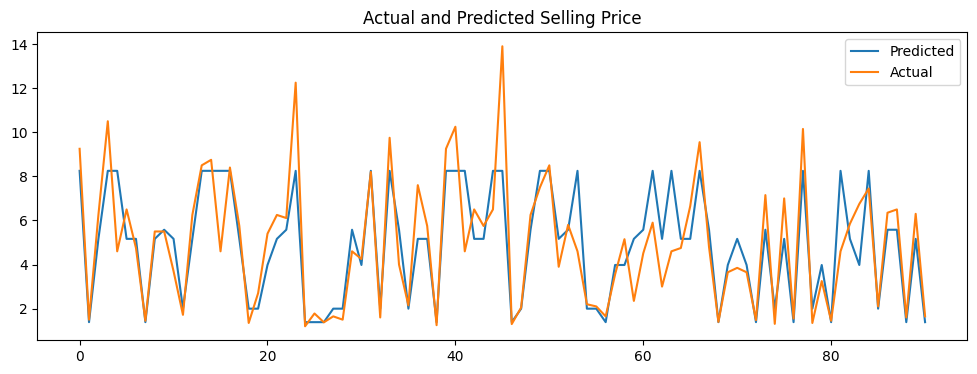

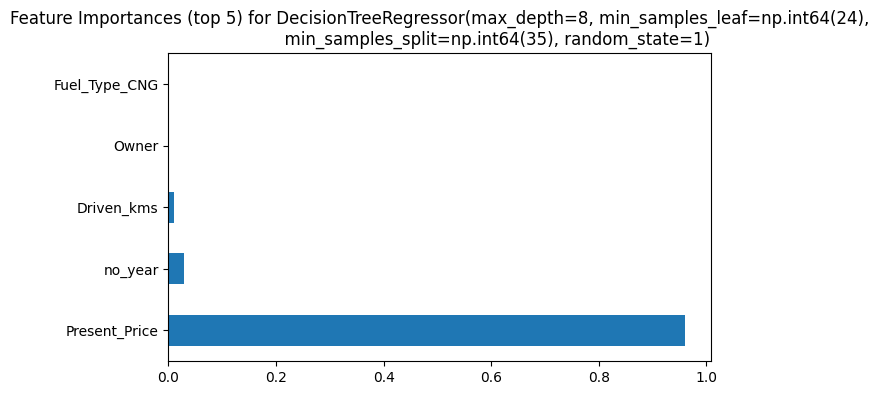

In [87]:
# Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

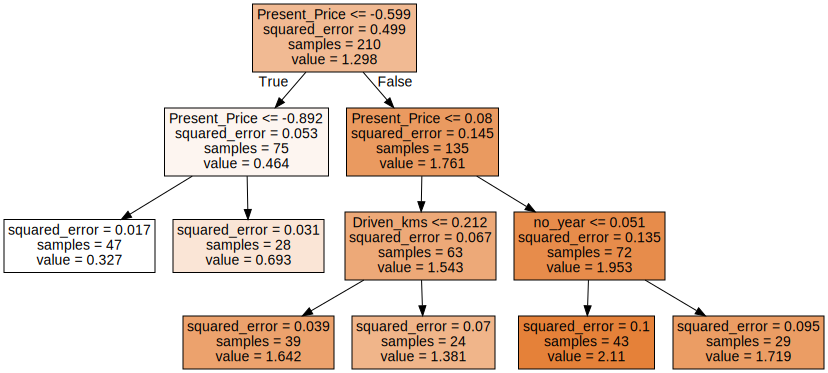

In [88]:
# Decision tree diagram
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=features,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))

In [89]:
# Updated Evaluation Metric Score Chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453


In [90]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

MSE : 0.5703630266491334
RMSE : 0.7552238255306393
MAE : 0.4964348369318066
Train R2 : 0.986129340989375
Test R2 : 0.930576101061694
Adjusted R2 :  0.920909482222183


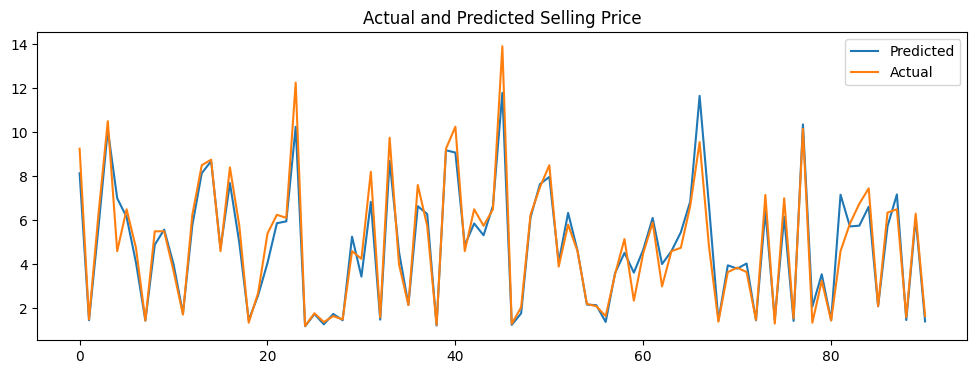

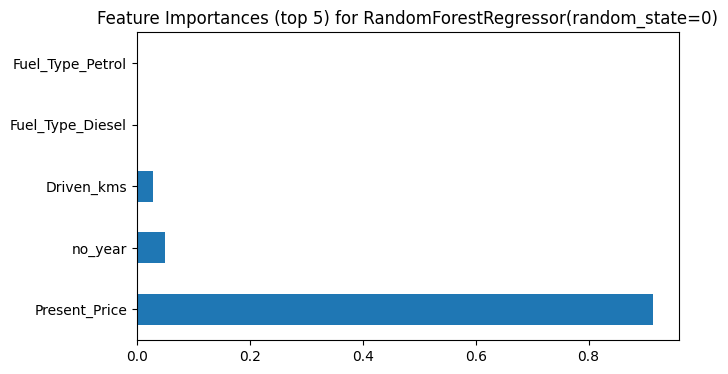

In [91]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [92]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226,0.570363
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201,0.755224
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127,0.496435
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.986129
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709,0.930576
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453,0.920909


In [93]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [94]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [95]:
# Best parameters for random forests
rf_best_params

{'min_samples_leaf': np.int64(20), 'n_estimators': 300}

In [96]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [97]:
# Fitting model
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=np.int64(20), n_estimators=300,
                      random_state=0)

In [98]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

MSE : 2.1598547137265682
RMSE : 1.469644417444767
MAE : 1.0105183093409997
Train R2 : 0.7710484475746359
Test R2 : 0.7371050920882742
Adjusted R2 :  0.7004994719992997


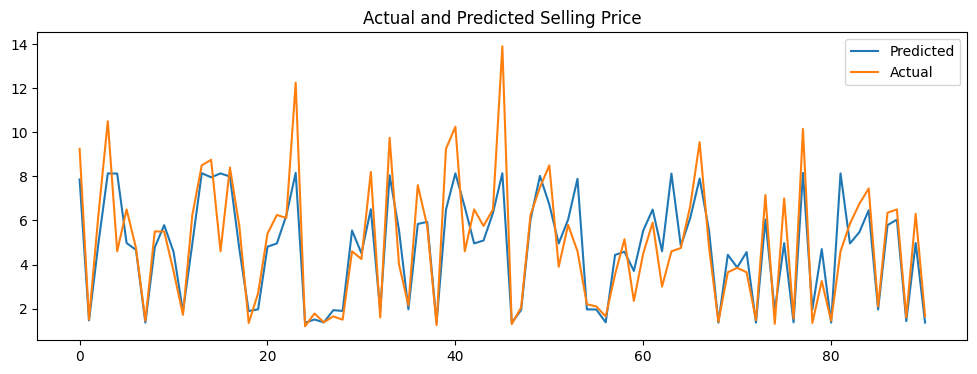

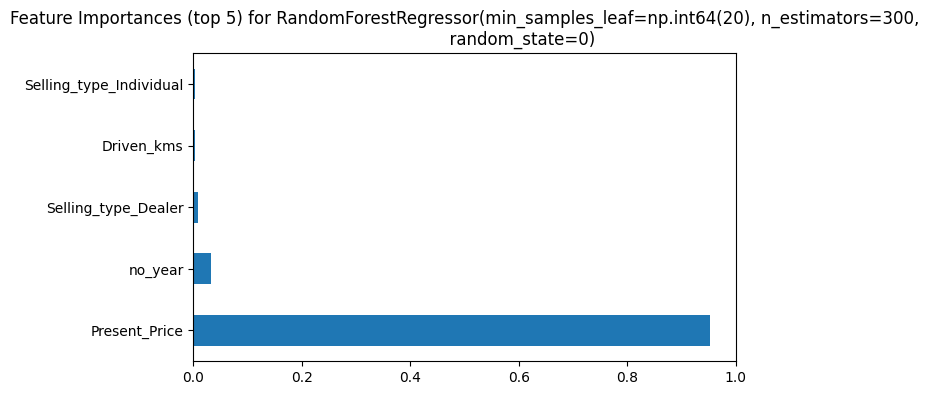

In [99]:
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

In [100]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226,0.570363,2.159855
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201,0.755224,1.469644
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127,0.496435,1.010518
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.986129,0.771048
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709,0.930576,0.737105
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453,0.920909,0.700499


In [101]:
# Import Gradient Boosting Regressor class
gb = GradientBoostingRegressor(random_state=0)

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)

MSE : 0.7825934107901825
RMSE : 0.8846430979723872
MAE : 0.5442337187754388
Train R2 : 0.9878401898231808
Test R2 : 0.9047436749544004
Adjusted R2 :  0.8914801360240006


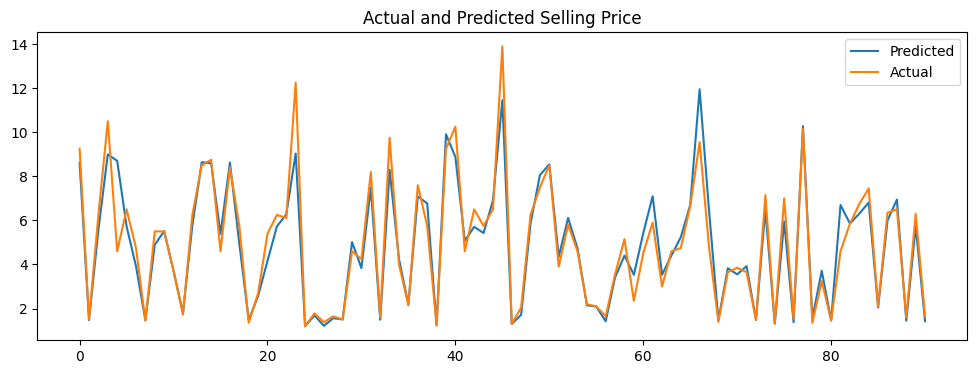

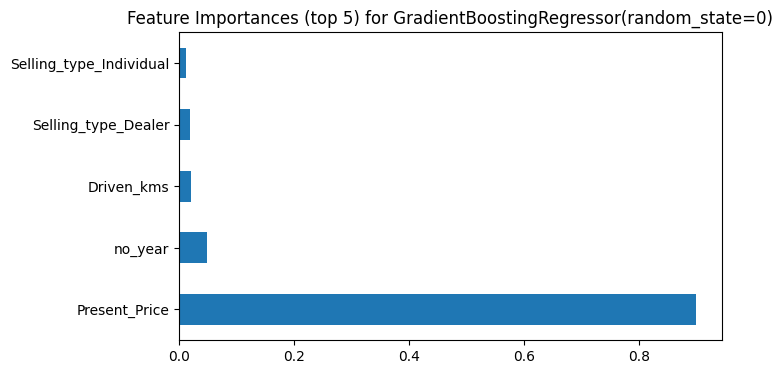

In [102]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [103]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226,0.570363,2.159855,0.782593
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201,0.755224,1.469644,0.884643
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127,0.496435,1.010518,0.544234
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.986129,0.771048,0.987840
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709,0.930576,0.737105,0.904744
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453,0.920909,0.700499,0.891480


In [104]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [105]:
# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [106]:
# Best parameters for Gradient Boosting Model
gb_best_params

{'n_estimators': 300,
 'min_samples_leaf': np.int64(21),
 'max_depth': np.int64(14)}

In [107]:
# Building Gradient Boosting Model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)

In [108]:
# Fitting model
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=np.int64(14), min_samples_leaf=np.int64(21),
                          n_estimators=300, random_state=0)

In [109]:
# Predict on the Model
y_pred_gb = gb_model.predict(X_test)

MSE : 0.9660864613247788
RMSE : 0.9828969739117009
MAE : 0.6291604780769248
Train R2 : 0.9611408871934671
Test R2 : 0.8824091223957687
Adjusted R2 :  0.8660357090584707


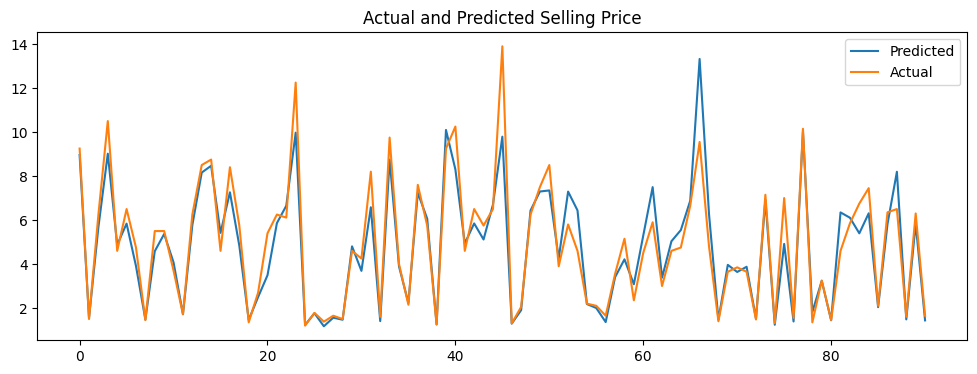

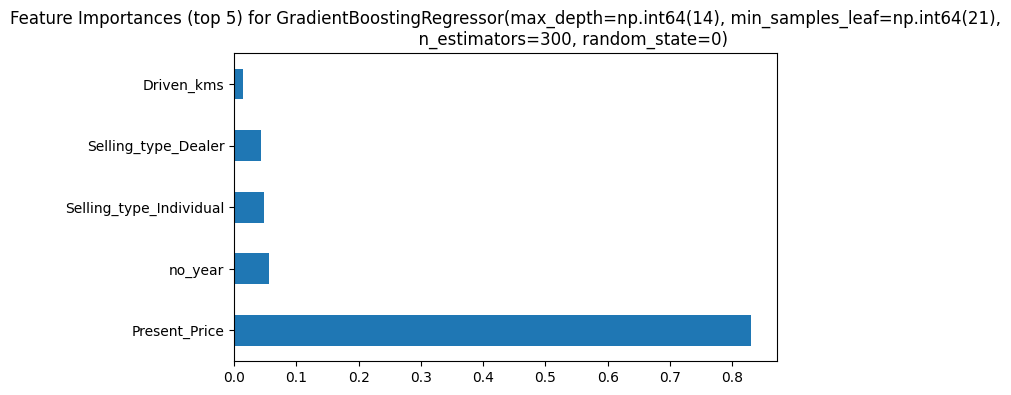

In [110]:
# Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

In [111]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226,0.570363,2.159855,0.782593,0.966086
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201,0.755224,1.469644,0.884643,0.982897
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127,0.496435,1.010518,0.544234,0.629160
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.986129,0.771048,0.987840,0.961141
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709,0.930576,0.737105,0.904744,0.882409
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453,0.920909,0.700499,0.891480,0.866036


In [112]:
# Import Extreme Gradient Boosting Regressor class
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

MSE : 0.9137531518936157
RMSE : 0.955904363361532
MAE : 0.5729007720947266
Train R2 : 0.9999845027923584
Test R2 : 0.8887791037559509
Adjusted R2 :  0.8732926498485517


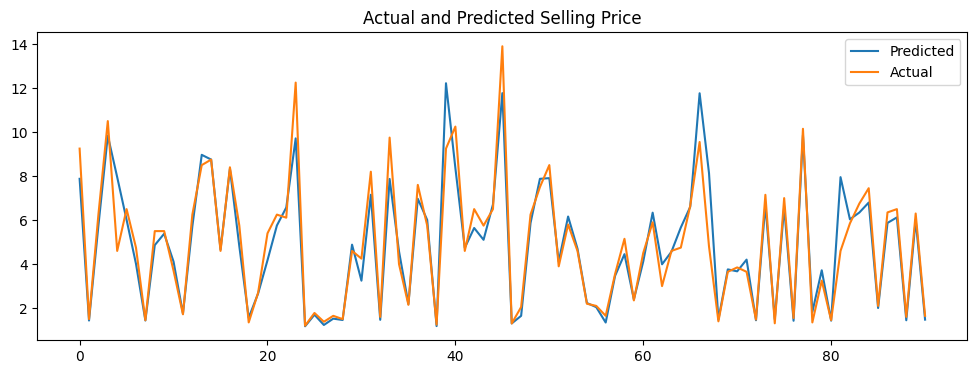

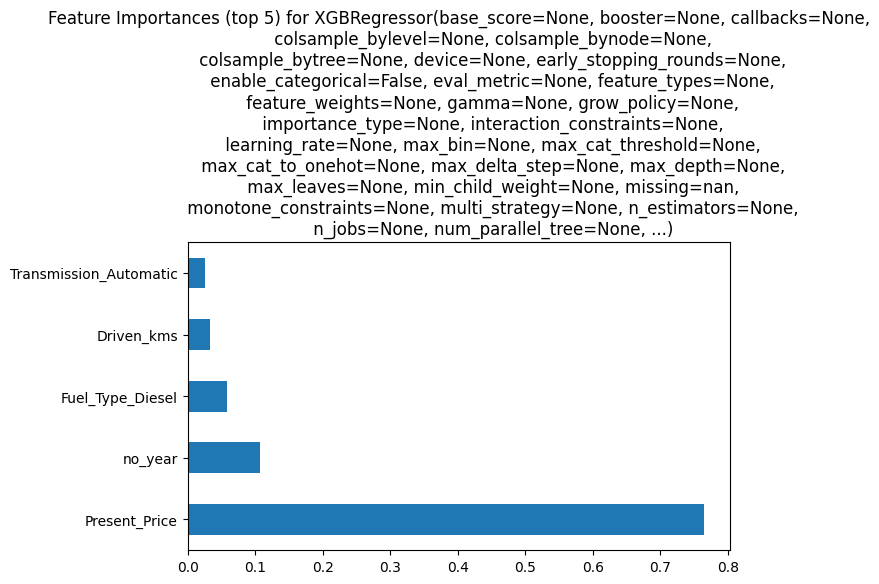

In [113]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

In [114]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226,0.570363,2.159855,0.782593,0.966086,0.913753
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201,0.755224,1.469644,0.884643,0.982897,0.955904
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127,0.496435,1.010518,0.544234,0.629160,0.572901
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.986129,0.771048,0.987840,0.961141,0.999985
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709,0.930576,0.737105,0.904744,0.882409,0.888779
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453,0.920909,0.700499,0.891480,0.866036,0.873293


In [115]:
# XG boost model
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [116]:
# Perform the randomized search
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [117]:
# Best parameters for XG boost Model
xgb_best_params

{'n_estimators': 500, 'min_samples_leaf': np.int64(20)}

In [118]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [119]:
# Fitting model
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None,
             min_samples_leaf=np.int64(20), missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, ...)

In [120]:
# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)

MSE : 0.9137531518936157
RMSE : 0.955904363361532
MAE : 0.5729007720947266
Train R2 : 0.9999845027923584
Test R2 : 0.8887791037559509
Adjusted R2 :  0.8732926498485517


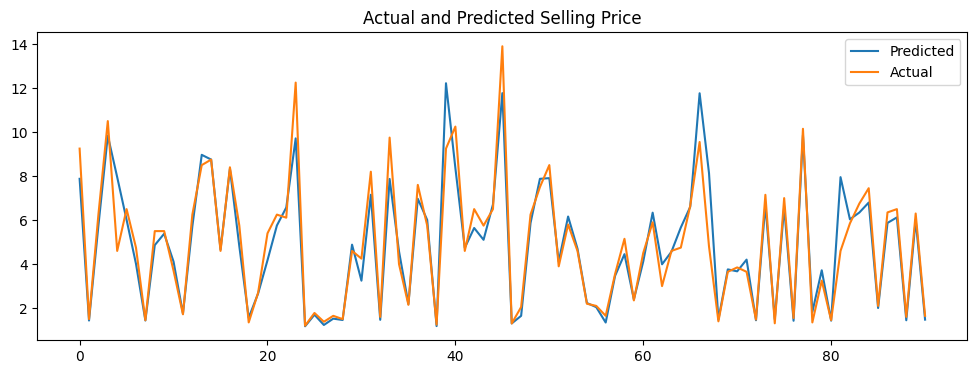

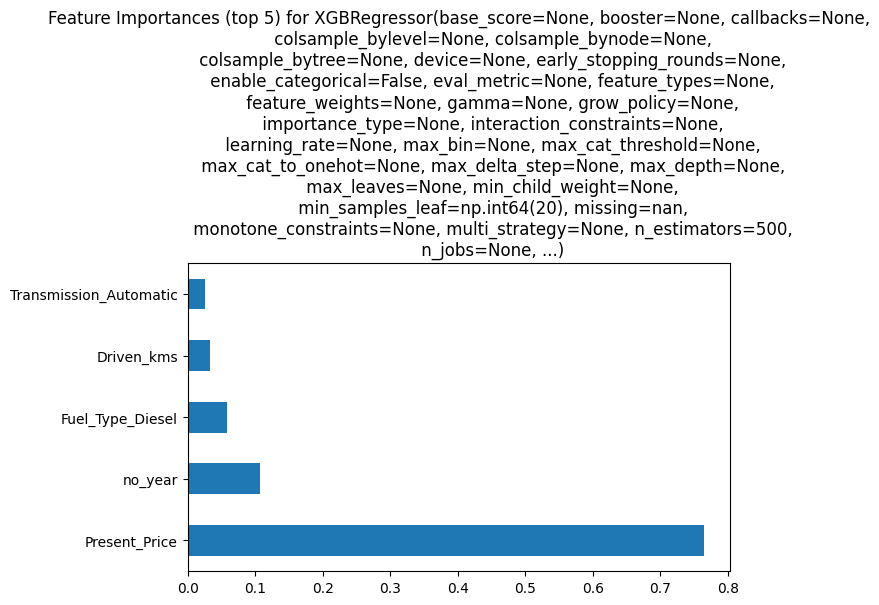

In [121]:
# Evaluation matrices for XGBRegressor
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Extreme Gradient Boosting Regressor Tuned'] = result

In [122]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor,Extreme Gradient Boosting Regressor Tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226,0.570363,2.159855,0.782593,0.966086,0.913753,0.913753
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201,0.755224,1.469644,0.884643,0.982897,0.955904,0.955904
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127,0.496435,1.010518,0.544234,0.629160,0.572901,0.572901
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.986129,0.771048,0.987840,0.961141,0.999985,0.999985
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709,0.930576,0.737105,0.904744,0.882409,0.888779,0.888779
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453,0.920909,0.700499,0.891480,0.866036,0.873293,0.873293


In [123]:
score.columns

Index(['Linear regression', 'Linear regression tuned', 'Lasso regression',
       'Lasso with alpha = 0.01', 'Ridge', 'Ridge with alpha = 10',
       'Decision tree', 'Decision tree tuned', 'Random forest',
       'Random forest tuned', 'Gradient Boosting Regressor',
       'Gradient Boosting Regressor Tuned',
       'Extreme Gradient Boosting Regressor',
       'Extreme Gradient Boosting Regressor Tuned'],
      dtype='object')

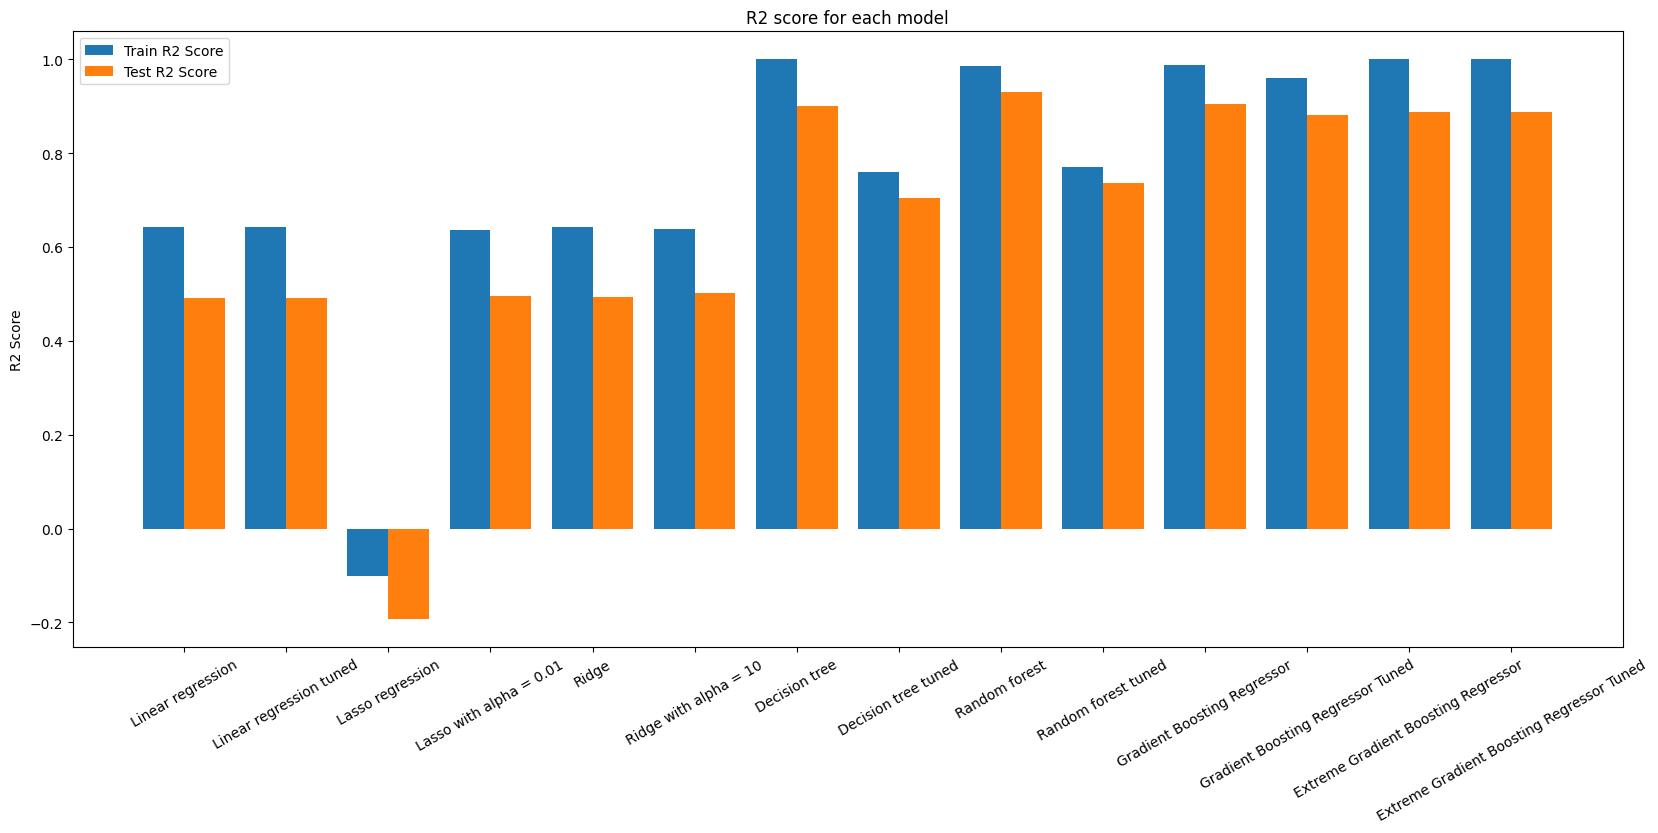

In [132]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

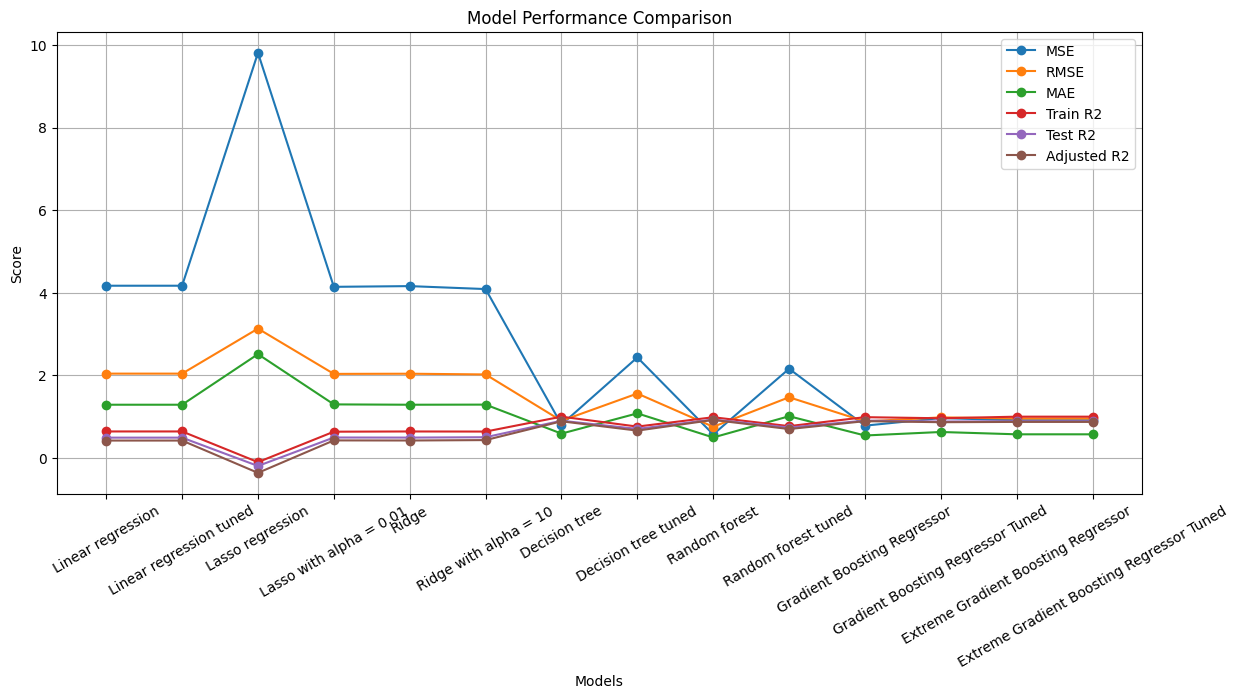

In [133]:
#R2 plot Using line chart
plt.figure(figsize=(14,6))

for metric in score.index:            # R2, RMSE, MAE
    plt.plot(score.columns, score.loc[metric], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()

In [125]:
import pickle
# Save the model to a pickle file
with open("random_forest_regression_model.pkl", "wb") as f:
  pickle.dump(rf, f)

In [126]:
from google.colab import files
files.download("random_forest_regression_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
# -------------------- Support Vector Regressor --------------------
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scaling X (same style as other scaled models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
svr_model = SVR(kernel='rbf', C=100, gamma='scale')

# Train
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test_scaled)


MSE : 1.3360966567189487
RMSE : 1.1558964731838872
MAE : 0.730527529584951
Train R2 : 0.9530226166143583
Test R2 : 0.8373719281686091
Adjusted R2 :  0.8147275131034787


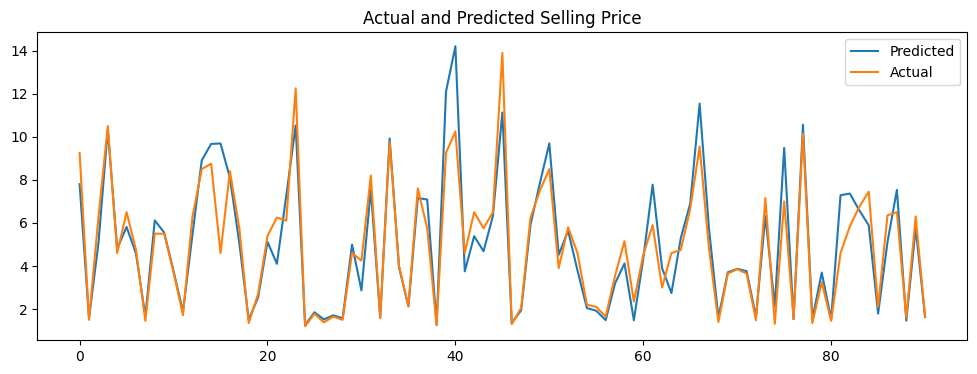

In [144]:
svr_score = evaluate_model(svr_model, y_test, y_pred_svr)
score['SVR'] = svr_score

In [145]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor,Extreme Gradient Boosting Regressor Tuned,SVR
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226,0.570363,2.159855,0.782593,0.966086,0.913753,0.913753,1.336097
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201,0.755224,1.469644,0.884643,0.982897,0.955904,0.955904,1.155896
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127,0.496435,1.010518,0.544234,0.629160,0.572901,0.572901,0.730528
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.986129,0.771048,0.987840,0.961141,0.999985,0.999985,0.953023
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709,0.930576,0.737105,0.904744,0.882409,0.888779,0.888779,0.837372
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453,0.920909,0.700499,0.891480,0.866036,0.873293,0.873293,0.814728


In [148]:
# Define the model
svm_reg = SVR()

# Define the parameters to be optimized
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 50, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

# Perform grid search with 5-fold cross-validation
grid_search_svm = GridSearchCV(
    svm_reg,
    param_grid,
    cv=5,
    scoring='r2',
    return_train_score=True
)

# Train grid search
grid_search_svm.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search_svm.best_params_)

# Best estimator (best model)
print("Best SVM Model:", grid_search_svm.best_estimator_)

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best SVM Model: SVR(C=100, gamma=0.01)


MSE : 2.653718833822842
RMSE : 1.6290238898870826
MAE : 0.7442163663470105
Train R2 : 0.8902156594513002
Test R2 : 0.6769925476895808
Adjusted R2 :  0.6320168264818009


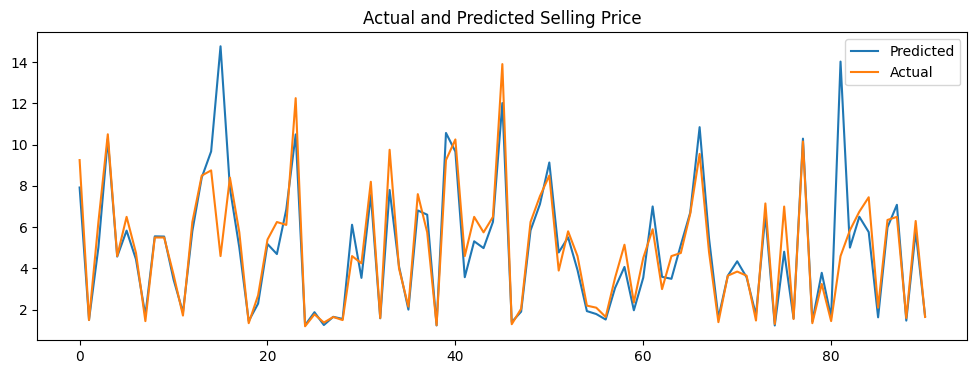

In [150]:
# -------------------- Tuned Support Vector Regressor --------------------

# Extract best params from GridSearchCV
svm_best_params = grid_search_svm.best_params_

# Build SVR model with best parameters
svr_model = SVR(kernel = svm_best_params['kernel'],
                C      = svm_best_params['C'],
                gamma  = svm_best_params['gamma'])

# Scale X (as required for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR model
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate and store in score dictionary
result = evaluate_model(svr_model, y_test, y_pred_svr)
score['Support Vector Regressor Tuned'] = result



In [151]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor,Extreme Gradient Boosting Regressor Tuned,SVR,Support Vector Regressor Tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654,2.434226,0.570363,2.159855,0.782593,0.966086,0.913753,0.913753,1.336097,2.653719
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252,1.560201,0.755224,1.469644,0.884643,0.982897,0.955904,0.955904,1.155896,1.629024
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780,1.080127,0.496435,1.010518,0.544234,0.629160,0.572901,0.572901,0.730528,0.744216
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.986129,0.771048,0.987840,0.961141,0.999985,0.999985,0.953023,0.890216
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572,0.703709,0.930576,0.737105,0.904744,0.882409,0.888779,0.888779,0.837372,0.676993
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866,0.662453,0.920909,0.700499,0.891480,0.866036,0.873293,0.873293,0.814728,0.632017


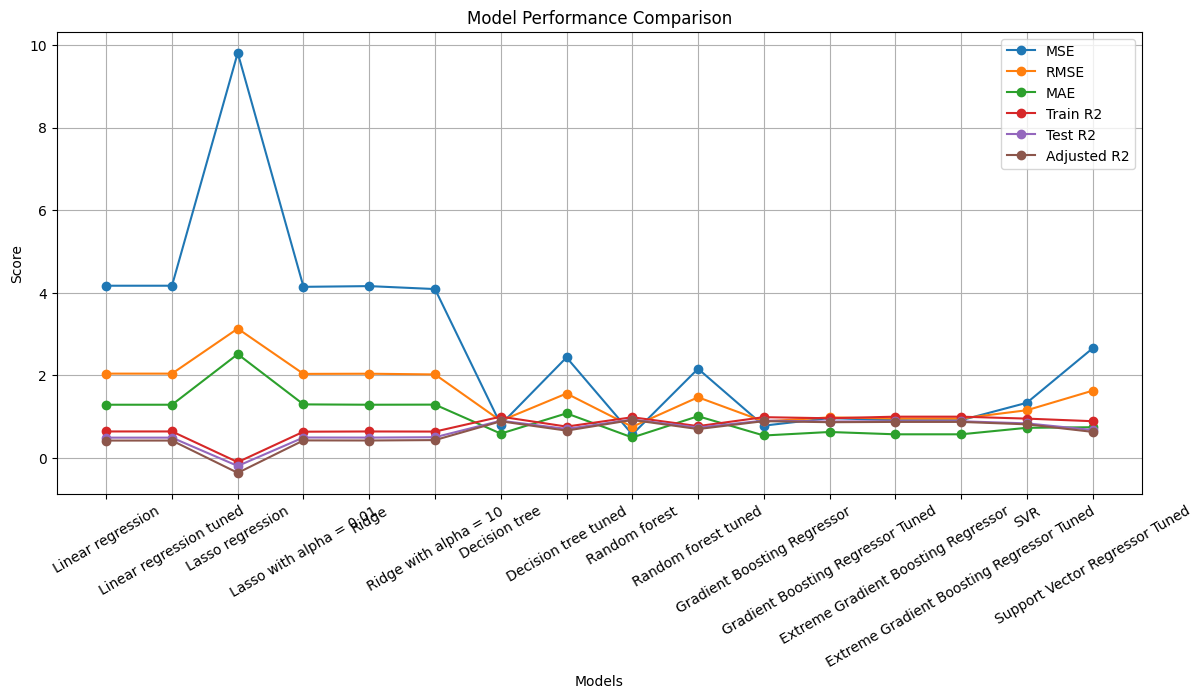

In [156]:
#R2 plot Using line chart
plt.figure(figsize=(14,6))

for metric in score.index:            # R2, RMSE, MAE
    plt.plot(score.columns, score.loc[metric], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()



In [157]:
import pickle

# Save XGB model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Save SVR model
with open("svr_model.pkl", "wb") as f:
    pickle.dump(svr_model, f)


In [158]:
from google.colab import files

files.download("xgb_model.pkl")
files.download("svr_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>